# **🧠 Aprendizaje No Supervisado**

¡Bienvenid@ a este nuevo mini curso donde por fin exploraremos técnicas de **aprendizaje no supervisado**!  
Cada vez estás más cerca de **dominar el machine learning** con este poderoso lenguaje: **¡Python!** 🐍🚀


## 🔍 **¿Qué es el aprendizaje no supervisado?**

Como te mencioné brevemente en nuestro curso anterior sobre aprendizaje supervisado, el **aprendizaje no supervisado** es súper interesante porque emplea algoritmos de machine learning para **analizar y agrupar conjuntos de datos sin etiquetar**.  
✨ Esto significa que estos algoritmos pueden **descubrir agrupaciones, patrones y estructuras ocultas** en los datos **sin intervención humana directa**.



## 📉 **Reducción de dimensionalidad**

Otro de los conceptos clave que aprenderás en este curso es la **reducción de dimensionalidad**.  
Esto, en términos generales, nos permite **reducir la cantidad de variables en un dataset** mientras conservamos la información más importante.  
Una de las razones principales para implementar estas técnicas es que **trabajar con demasiadas variables** puede llevar a escenarios de **sobreajuste (overfitting)** ⚠️.

En este curso nos enfocaremos en una de las técnicas más utilizadas:  
🔷 **Análisis de Componentes Principales (PCA)**  
Pero no olvides que también existen otras herramientas útiles como:  
- 🌀 **t-SNE** (t-distributed Stochastic Neighbor Embedding)  
- 🌐 **UMAP** (Uniform Manifold Approximation and Projection)



Prepárate para una nueva aventura en la que aprenderás a **detectar patrones ocultos, crear clusters inteligentes y reducir dimensiones de forma eficiente**. ¡Vamos con todo! 💪📊


Como es costumbre en mis mini cursos, comenzaremos **importando las librerías necesarias** que nos acompañarán a lo largo de esta nueva aventura.  
Además, haremos una **primera exploración de los datos** con los que trabajaremos para que te familiarices con su estructura.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

### 🧾 **Nuestra Base de Datos**

En esta ocasión estaremos trabajando con el dataset **"Student Habits vs Academic Performance"**, el cual fue extraído de los recursos disponibles en **Kaggle**.  
📎 Si deseas **replicar exactamente cada uno de los pasos** que iremos realizando a lo largo de este mini curso, puedes descargar el dataset directamente desde este repositorio.  
Sin embargo, como siempre te recomiendo, también puedes usar tus propias bases de datos y adaptar las instrucciones a las necesidades específicas de tu análisis.

⚠️ **Recomendación importante:**  
Para seguir este curso sin inconvenientes, es fundamental que tu base de datos esté:
- ✅ **Limpia**
- ✅ **Compuesta únicamente por variables numéricas**  

Si tu conjunto de datos no cumple con alguna de estas condiciones, te invito a hacer una limpieza previa antes de continuar. Puedes revisar nuestro curso anterior de limpieza de datos si necesitas una guía para ello. 🧼📊


#### 🧠 **¿Qué contiene el dataset "Student Habits vs Academic Performance"?**

Se trata de un **dataset simulado** que explora cómo los hábitos relacionados con el estilo de vida impactan el **desempeño académico** de los estudiantes.

📌 Está compuesto por:
- 👥 **1000 estudiantes sintéticos**
- 📈 **Más de 15 variables** que incluyen:
  - Patrones de sueño 🛌
  - Uso de redes sociales 📱
  - Calidad de la dieta 🥗
  - Salud mental 🧠
  - Resultados de exámenes finales 🧾

🔄 Más adelante, utilizaremos técnicas de reducción de dimensionalidad para condensar esta información y extraer insights valiosos de forma más eficiente.

In [99]:
df=pd.read_csv(r".\student_habits_performance.csv", delimiter=",", quotechar='"')
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


🚨🚨🚨
Como puedes ver, nuestra base de datos contiene algunas **variables no numéricas** que si no las transformamos a numéricas podrían traernos problemas más adelante, para ello estaremos usando un pipeline:

- `student_id` 🆔 
- `gender` ⚧ 
- `part_time_job` 💼  
- `diet_quality` 🥗  
- `parental_education_level` 🎓  
- `internet_quality` 🌐  
- `extracurricular_participation` 🏃‍♂️  

🔍 De la única variable de la que estaremos prescindiedo será `student_id` pues al tratarse de una variable identificadora no aporta información significativa .

In [100]:
df = df.drop(['student_id'], axis=1)


In [101]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

cat_vars = [
    'part_time_job', 'diet_quality', 'parental_education_level',
    'internet_quality', 'extracurricular_participation', 'gender'
]

num_vars = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]

cat_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_vars)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_processed_array = pipeline.fit_transform(df)

cat_feature_names = pipeline.named_steps['preprocessor']\
                            .named_transformers_['cat']\
                            .get_feature_names_out(cat_vars)

final_columns = list(cat_feature_names) + num_vars

# Crear DataFrame final
X = pd.DataFrame(df_processed_array, columns=final_columns)

# Mostramos resultado
X.head()

,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,parental_education_level_nan,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes,gender_Male,gender_Other,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,0.0,1.2,1.1,85.0,8.0,6.0,8.0,56.2
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,6.9,2.8,2.3,97.3,4.6,6.0,8.0,100.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21.0,1.4,3.1,1.3,94.8,8.0,1.0,1.0,34.3
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,23.0,1.0,3.9,1.0,71.0,9.2,4.0,1.0,26.8
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,5.0,4.4,0.5,90.9,4.9,3.0,1.0,66.4


Una vez ejecutado nuestro pipeline, se observa que:

🔄 Todas las variables categóricas han sido transformadas correctamente.

🔢 La base de datos ahora está compuesta únicamente por valores numéricos, adecuados para modelos de machine learning.

📈 El número de columnas aumentó debido a la codificación de variables categóricas (por ejemplo, con OneHotEncoding).

🧠 Este comportamiento es esperado y está explicado en uno de mis cursos anteriores.

🔗 Si quieres entender en detalle este proceso, te invito a revisar el curso "Pipelines de Preprocesamiento" disponible en mi cuenta de GitHub.

Puedes encontrarlo aquí: https://github.com/SusanaGee/Introduccion-a-Pipelines-de-Preprocesamiento

En caso de que quieras confirmar que tu base de datos no cuenta con valores nulos puedes usar esta línea de código:

In [102]:
X.isna().sum().reset_index().rename(columns={"index":"Variable", 0:"Valores faltantes"})

,Variable,Valores faltantes
0,part_time_job_Yes,0
1,diet_quality_Good,0
2,diet_quality_Poor,0
3,parental_education_level_High School,0
4,parental_education_level_Master,0
5,parental_education_level_nan,0
6,internet_quality_Good,0
7,internet_quality_Poor,0
8,extracurricular_participation_Yes,0
9,gender_Male,0


Antes de lanzarnos oficialmente al proceso de **aprendizaje no supervisado**, vamos a dar un paso muy importante: **extraer rápidamente las estadísticas descriptivas** de nuestro dataset.

Aunque no las analicemos a profundidad en esta etapa, es **crucial tener una primera impresión de las dinámicas internas** de nuestra base de datos. Esto nos permite identificar rangos, distribuciones y posibles anomalías que podrían influir en los resultados posteriores. ⚠️

In [103]:
X.describe()

,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,parental_education_level_nan,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes,gender_Male,gender_Other,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.215000,0.37800,0.185000,0.392000,0.167000,0.091000,0.447000,0.162000,0.318000,0.477000,0.04200,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,0.411028,0.48513,0.388492,0.488441,0.373162,0.287753,0.497432,0.368635,0.465932,0.499721,0.20069,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Podemos identificar que la **edad de los estudiantes** analizados se encuentra en un rango entre **17 y 24 años**, con un **promedio de 20 años**. 🎓

Por otro lado, se percibe que las **demás variables presentan rangos relativamente amplios**, lo cual es una excelente señal, ya que sugiere que la base de datos fue **bien simulada**, ofreciéndonos una muestra **variada y diversa**. Esto es super valioso para aplicar modelos de aprendizaje no supervisado, pues nos tendremos la oportunidad de identificar patrones y las agrupaciones más significativas. 🔍📊

💡 En caso de que quieras **profundizar en alguna de las variables**, puedes consultar el pequeño dataset que se obtuvo con las estadísticas descriptivas.

🎯 **Definición de la Variable Objetivo**

La variable objetivo de nuestro estudio, o aquella que deseamos analizar, será el resultado obtenido en los exámenes (exam_score) 

No obstante, dado que se trata de una variable con una gran cantidad de posibles valores, se le aplicará una transformación a la variable original. A partir de esto, crearemos subcategorías según los valores originales, así:

In [104]:
y = pd.cut(X['exam_score'], bins=[0, 60, 80, 100], labels=[1, 2, 3])
X


,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,parental_education_level_nan,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes,gender_Male,gender_Other,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,0.0,1.2,1.1,85.0,8.0,6.0,8.0,56.2
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,6.9,2.8,2.3,97.3,4.6,6.0,8.0,100.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21.0,1.4,3.1,1.3,94.8,8.0,1.0,1.0,34.3
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,23.0,1.0,3.9,1.0,71.0,9.2,4.0,1.0,26.8
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,5.0,4.4,0.5,90.9,4.9,3.0,1.0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,21.0,2.6,0.5,1.6,77.0,7.5,2.0,6.0,76.1
996,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.0,2.9,1.0,2.4,86.0,6.8,1.0,6.0,65.9
997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,20.0,3.0,2.6,1.3,61.9,6.5,5.0,9.0,64.4
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,5.4,4.1,1.1,100.0,7.6,0.0,1.0,69.7


La transformación aplicada se hizo en una escala de 1 a 3, donde 1 corresponde a una nota baja mietras que 3 es una nota alta. Esta conversión no se hizo directamente con variables categóricas pues esto podría generar problemas mas adelante.

### 🚀 **Inicio Oficial del Aprendizaje No Supervisado**

#### **Parte 1** 🤓

¡Llegó el momento de comenzar oficialmente con el aprendizaje no supervisado! 🎉

Como primer paso, vamos a **estandarizar toda nuestra base de datos**. Esto es fundamental porque nos permite llevar todas las variables a una **escala similar**, evitando que aquellas con valores más grandes dominen el análisis.

📏 La estandarización es especialmente importante en técnicas como **Análisis de Componentes Principales (PCA)**, la cual será nuestro siguiente gran paso. Aplicar PCA nos permitirá **reducir la dimensionalidad del dataset**, extrayendo las **características más relevantes** y facilitando la visualización de los datos. Además, con esta técnica podremos identificar **agrupaciones naturales** dentro de nuestros datos que pueden dar lugar a insights sorprendentes. ✨


In [105]:
# Para esta primera tarea usaremos un Pipeline, ¿ves lo últil que ha resultado este tema?
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA())
]).set_output(transform="pandas")

# Perform pipeline
X_pca = pipeline.fit_transform(X)
X_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19
0,-1.412279,-0.100223,-1.453086,-1.177942,-0.593320,1.689494,2.052872,1.146408,-0.153680,1.145665,0.592387,-0.694021,0.788277,-0.398028,1.550631,-0.938872,-0.854922,-1.436977,1.226388,0.160623
1,3.138385,-0.284352,1.509739,0.529355,0.559295,-0.488175,-0.948932,-0.280487,-0.898165,0.953085,-1.269461,0.382974,-0.420813,0.963289,0.986249,-1.154235,0.925559,-0.589871,0.415276,-0.371343
2,-2.597558,-3.058151,-1.271374,0.487968,-0.191694,-0.530658,-0.028989,-2.179834,0.475726,-0.008658,0.022267,-0.721806,0.576641,-1.131017,-0.380924,0.667389,0.931819,1.073188,0.138870,-0.255389
3,-3.564849,1.294339,-2.552471,0.048252,-1.493678,1.346800,1.924661,-1.087104,0.604501,0.510615,1.764241,-1.025410,0.509000,0.804755,-0.448873,-0.979612,0.444122,0.562957,0.575415,-0.453357
4,-0.166366,2.235636,-1.161903,-0.837745,-0.314808,-0.401517,-1.813075,-1.868429,-0.923026,0.307666,-0.353440,-1.503046,-0.216695,1.162616,0.455258,-0.391169,-0.632181,0.043429,0.452641,-0.168828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.078225,0.327356,0.375081,1.315138,-0.620223,0.577909,1.469753,0.638377,-1.343116,-0.714664,1.114905,0.001804,0.492445,-1.293551,-0.105707,-0.345173,-1.021801,0.243437,0.727568,0.395019
996,-0.478247,-1.320093,-0.692618,2.110261,-0.932297,0.777714,-0.981256,1.555286,0.031250,-1.143522,1.137131,-0.208466,-1.508137,-1.428129,0.275516,-0.762360,0.890857,0.054979,0.313548,0.025644
997,-0.209755,0.745735,1.470586,-0.910096,-0.894558,0.423321,1.284646,1.639896,-0.264115,0.552334,1.645331,0.335821,0.637353,1.426965,-0.745955,0.613333,-0.207510,0.360791,-0.829773,-0.300621
998,0.337034,0.220508,-0.600998,-0.445406,0.586074,-1.196659,-0.606108,-2.569501,2.447546,-1.520348,0.299449,-0.317814,-0.593074,-1.062199,0.682693,0.079583,-0.064217,-1.161776,-1.118201,-0.327947


La verdad es que estos números por sí solos no nos dicen mucho a simple vista 🤯. Por eso, te invito a que imprimamos el siguiente gráfico, el cual nos permitirá **aclarar y profundizar** mucho más en el entendimiento de la información recién obtenida.

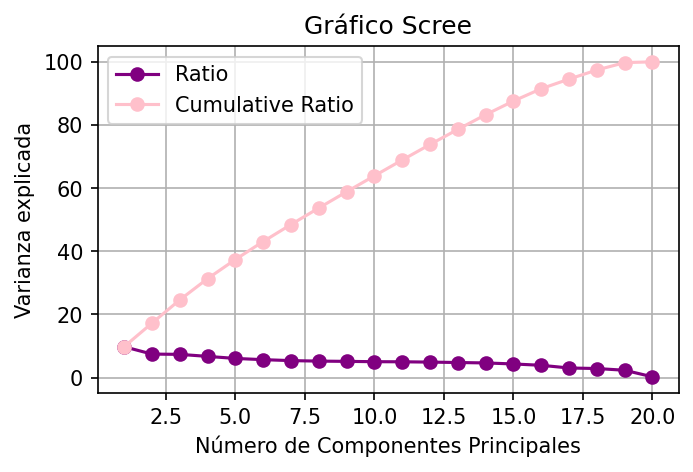

In [106]:
evr = pipeline.named_steps["pca"].explained_variance_ratio_

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(range(1, X.shape[1]+1), 100*evr, marker='o', linestyle='-', c="purple", label="Ratio")
plt.plot(range(1, X.shape[1]+1), 100*np.cumsum(evr), marker='o', linestyle='-', c="pink", label="Cumulative Ratio")
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza explicada')
plt.title('Gráfico Scree')
plt.legend()
plt.grid(True)
plt.show()

#### 🧮 Interpretación del Scree Plot (Gráfico de Sedimentación)
Ya con el gráfico de sedimentación frente a nosotros —el clásico Scree Plot—, podemos analizar qué nos está revelando el Análisis de Componentes Principales (PCA). Esta herramienta es fundamental cuando queremos reducir la dimensionalidad, pero sin perder demasiada información en el proceso.

📌 ¿Qué representa cada línea?

🔹 **Ratio (en morado oscuro):**
Esta línea indica la varianza explicada individualmente por cada componente principal.

Podemos ver que el primer componente explica aproximadamente un 9-10% de la varianza total.

A partir del segundo componente, la contribución de cada uno disminuye progresivamente de forma bastante suave. Ningún componente salta como mucho más informativo que los demás, lo que sugiere una dispersión de la información entre muchas dimensiones.

Los últimos componentes (a partir del 15 en adelante) tienen una contribución muy baja, cercana a 0%, por lo que apenas aportan valor adicional.

🔸 **Cumulative Ratio (en rosa claro):**
Representa la varianza explicada acumulada conforme se suman componentes principales.

Observamos una línea ascendente bastante lineal, lo que implica que no hay pocos componentes dominantes, sino que la información está bastante distribuida.

Para alcanzar aproximadamente un 80% de varianza explicada, es necesario incluir al menos 15 componentes.

Si buscamos una reducción más agresiva (por ejemplo, quedarnos con solo 5 o 6 componentes), la varianza explicada estaría muy por debajo del 60%, lo cual podría implicar pérdida importante de información.



Una vez hemos analizado estos hallazgos, vamos a reducir la dimensionalidad. Para ello, seleccionaremos los dos primeros componentes principales.📉

In [107]:
k=2
pca_seleccionados=X_pca.iloc[:, :k]
pca_seleccionados

,pca0,pca1
0,-1.412279,-0.100223
1,3.138385,-0.284352
2,-2.597558,-3.058151
3,-3.564849,1.294339
4,-0.166366,2.235636
...,...,...
995,0.078225,0.327356
996,-0.478247,-1.320093
997,-0.209755,0.745735
998,0.337034,0.220508


Recuerda que los componentes principales se cuentan a partir de cero, por eso vemos pca0 y pca1

#### 🔍 Observando los Componentes Principales
Si bien ya tuvimos un primer acercamiento a estos dos componentes principales, es importante observar su comportamiento más de cerca. Para ello, podemos emplear un gráfico de dispersión.


Text(0.5, 1.0, 'Gráfico PCA')

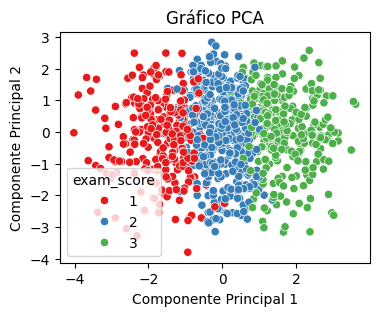

In [108]:
import seaborn as sns

plt.figure(figsize=(4, 3), dpi=100)
sns.scatterplot(data=pca_seleccionados, x="pca0", y="pca1",hue=y, palette="Set1")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico PCA')

🧠 Es muy importante comprender que, si bien cada uno de los puntos corresponde a un estudiante, el punto no representa el puntaje obtenido durante el examen. Por el contrario, se trata de combinaciones lineales de las variables originales.

Asimismo, cada color representa un nivel en la variable `exam_score`, que se usó únicamente para visualización, mas no para entrenar el modelo PCA.

Dada la distribución que presentan los colores, es posible intuir que existen patrones en las variables predictoras que se correlacionan con el desempeño académico.


Para concluir esta primera etapa vamos a ejecutar un mapa de calor o correlación para comprender como se estan reacionando entre sí los dos primero componenetes principales:

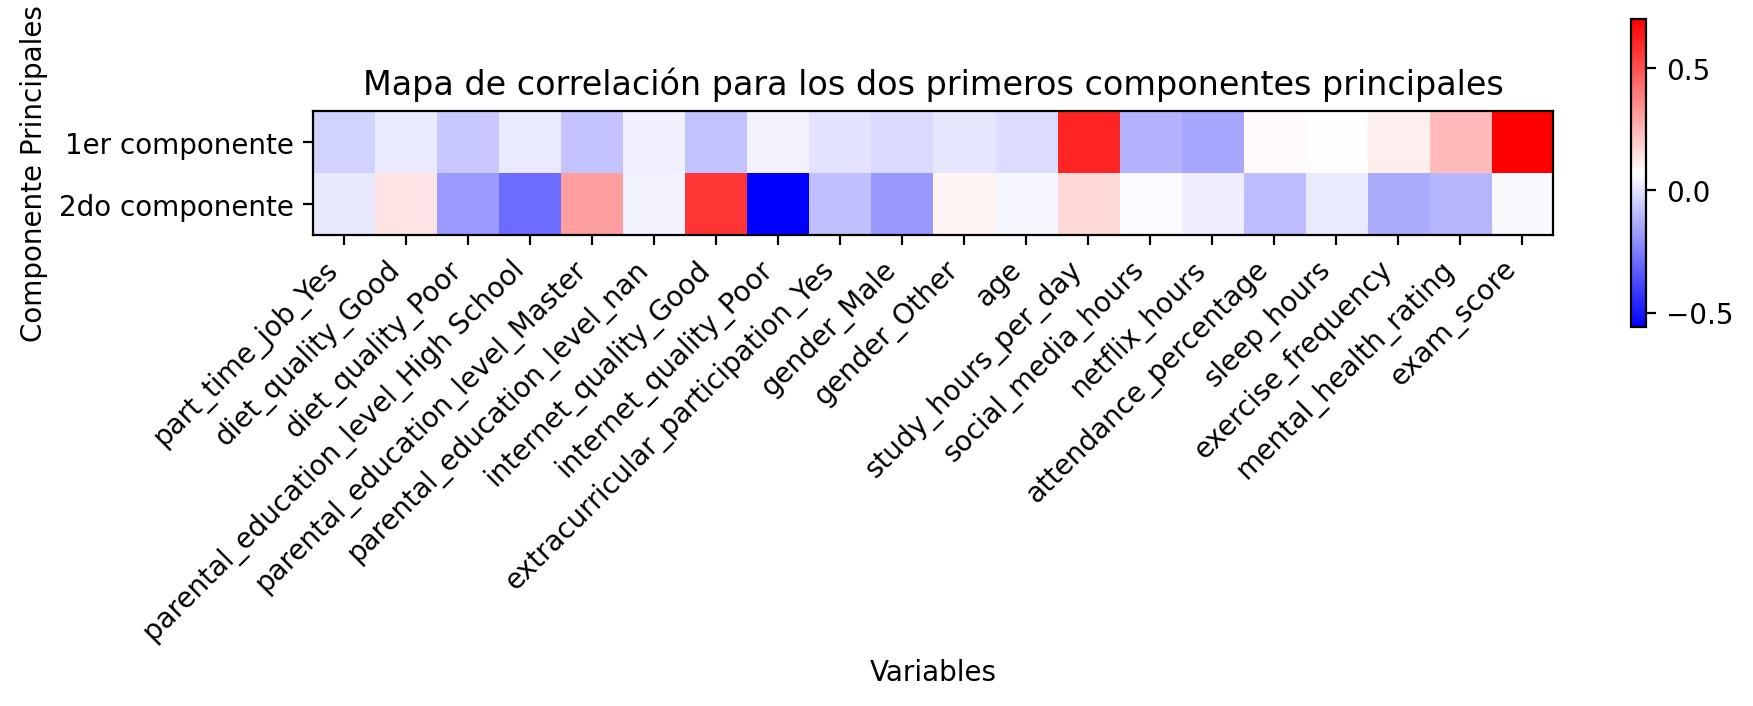

In [109]:
plt.figure(figsize=(10, 2), dpi=200)
plt.imshow(
    X=pipeline.named_steps["pca"].components_[:2, :],
    #X=pca.components_[:2, :],
    cmap="bwr"
)
plt.title('Mapa de correlación para los dos primeros componentes principales')
plt.xlabel('Variables')
plt.ylabel('Componente Principales')
plt.xticks(
    ticks=range(len(X.columns)),
    labels=X.columns,
    rotation=45, ha='right'
)
plt.yticks([0, 1], ["1er componente", "2do componente"])
plt.colorbar()
plt.show()

##### 🔥**Interpretación del Mapa de Calor**
De manera similar al gráfico de dispersión, este mapa de calor tampoco se interpreta de forma tradicional, ya que estamos observando la influencia de cada una de las variables sobre los componentes, y no la correlación entre las mismas variables.

**Primer componente principal:**  
Las variables que muestran una fuerte correlación positiva con este componente son: `exam_score`,`parental_education_level_Master`, `study_hours_per_day`. Esto sugiere que el primer componente está capturando principalmente factores académicos y socioeducativos. Un mayor puntaje en estas variables se asocia con un valor más alto del componente.

Por el contrario, hay una correlación negativa considerable con `internet_quality_Poor`, lo cual indica que tener una mala conexión a internet reduce el valor de este componente, lo que podría estar reflejando limitaciones estructurales que afectan el desempeño.

Las variables como `gender_Male`, `parental_education_level_High School`, y `diet_quality_Poor` tienen una leve correlación negativa, aunque no muy significativa.

**Segundo componente principal:**  
En este caso, la variable que más contribuye positivamente es `gender_Other,`. También hay cierta correlación positiva leve con variables como `mental_health_rating` y `diet_quality_Good`, aunque no son dominantes.

En cuanto a correlaciones negativas, destaca `gender_Male` con una correlación claramente negativa. Esto podría sugerir que el segundo componente está capturando una dimensión ligada a diferencias de género, especialmente en cómo ciertas variables se agrupan según el género.

Otras variables como `social_media_hours`, `sleep_hours`, o `attendance_percentage` no muestran una relación fuerte con este componente.


#### 🌟 **Segunda Parte**

En esta segunda etapa de nuestra aventura por el **aprendizaje no supervisado** 🤖, nos estaremos concentrando en las diferentes técnicas que podemos emplear para la **selección de variables** 🔍. En este proceso tendremos en cuenta **cuatro criterios principales**:

1. **Alta varianza** 📈:  
   Las variables deben tener una varianza elevada, ya que aquellas con baja varianza tienden a contener información menos valiosa.

2. **Baja correlación entre variables** 🔗:  
   Las variables no deben estar altamente correlacionadas entre sí, ya que esto podría generar problemas de redundancia.

3. **Separabilidad clara** ✂️:  
   En armonía con el punto anterior, las variables deben ser fácilmente separables, lo cual permite distinguir entre grupos o clases.

4. **Distribuciones multimodales** 🌊:  
   Las variables con múltiples picos en su distribución pueden sugerir un agrupamiento natural y, por tanto, son útiles para el análisis.


En esta ocasión, estaremos empleando **solo una técnica de selección de variables**: **por varianza** 🤝.  
Sin embargo, existen otras técnicas adicionales como:

- Prueba **KS Test** ⚖️ (Kolmogorov-Smirnov)  
- **Importancia de variables** por medio de un modelo lineal 📐  
- **Importancia de variables** por medio de un árbol de decisión 🌳


Retomando la explicación anterior, con la metodología seleccionada se escogerán aquellas variables que están altamente correlacionadas con la variable objetivo `exam_score`, y que a su vez estén poco correlacionadas con las demás variables. Esto nos ayudará a reducir la redundancia. 📉


In [110]:
# El primer paso apra reducir la dimensionalidad es estandarizar nuestras variables, 
# de tal manera que todas queden en unidades de valor similares, facilitado el 
# procso
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)

X_scaled.head()

,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,parental_education_level_nan,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes,gender_Male,gender_Other,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,-0.523341,-0.779562,-0.476439,-0.802955,2.233388,-0.316402,-0.899065,-0.439679,1.464464,-0.955011,-0.209383,1.084551,-2.418068,-1.114064,-0.669750,0.092426,1.248120,1.461166,0.900186,-0.793922
1,-0.523341,1.282771,-0.476439,1.245400,-0.447750,-0.316402,-0.899065,-0.439679,-0.682844,-0.955011,-0.209383,-0.215870,2.281707,0.251315,0.446965,1.401696,-1.525661,1.461166,0.900186,1.800846
2,-0.523341,-0.779562,2.098906,1.245400,-0.447750,-0.316402,-0.899065,2.274388,-0.682844,1.047108,-0.209383,0.217604,-1.464491,0.507324,-0.483631,1.135584,1.248120,-1.008689,-1.559339,-2.091307
3,-0.523341,-0.779562,2.098906,-0.802955,2.233388,-0.316402,1.112266,-0.439679,1.464464,-0.955011,-0.209383,1.084551,-1.736942,1.190013,-0.762810,-1.397800,2.227102,0.473224,-1.559339,-2.535616
4,-0.523341,-0.779562,-0.476439,-0.802955,2.233388,-0.316402,1.112266,-0.439679,-0.682844,-0.955011,-0.209383,-0.649344,0.987566,1.616694,-1.228108,0.720450,-1.280916,-0.020747,-1.559339,-0.189661


In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_selector = VarianceThreshold(threshold=0.2)
var_selector.fit(X)

selected_columns = X_scaled.columns[var_selector.get_support()]

# Print results
print(f"Selected {len(selected_columns)} features out of {X.shape[1]}:")
print(selected_columns)
print("\n")
print("Discarded features:")
print(set(X.columns) - set(selected_columns))



Selected 14 features out of 20:
Index(['diet_quality_Good', 'parental_education_level_High School',
       'internet_quality_Good', 'extracurricular_participation_Yes',
       'gender_Male', 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score'],
      dtype='object')


Discarded features:
{'gender_Other', 'internet_quality_Poor', 'parental_education_level_nan', 'parental_education_level_Master', 'diet_quality_Poor', 'part_time_job_Yes'}


In [125]:
selected_columns = X_scaled.drop(['gender_Other', 'internet_quality_Poor', 
                                          'parental_education_level_nan', 'parental_education_level_Master', 
                                          'diet_quality_Poor',
                                          'part_time_job_Yes'],axis=1)

Como podemos observar:

✂️ A través del análisis de varianza, logramos reducir el número de variables de 20 a solo 14 (aunque se podrían considerar 13 si excluimos la variable dependiente).

🧮 Esta metodología elimina aquellas variables que presentan una baja varianza a lo largo de todas las observaciones.

⚠️ Las variables con baja varianza tienden a ser demasiado constantes, por lo que su aporte al modelo es limitado o irrelevante.

✅ Esta técnica es útil para simplificar el modelo, reducir el ruido y mejorar el rendimiento computacional sin perder información relevante.


## **¿Qué es el algoritmo K-means?**   🎯
K-means es un algoritmo de aprendizaje no supervisado que sirve para agrupar datos en clústeres (grupos) según su similitud.
El objetivo es encontrar K grupos distintos dentro de los datos, donde cada grupo contiene elementos que son parecidos entre sí.

**¿Cómo funciona?**

1. 🧩 Elige K (número de clústeres) que deseas encontrar.

2. 🎯 Inicializa K centroides (puntos representativos del centro de cada grupo).

3. 🧲 Asigna cada punto de datos al centroide más cercano → formando los grupos.

4. 🔄 Recalcula los centroides como el promedio de los puntos en cada grupo.

5. ♻️ Repite los pasos 3 y 4 hasta que los grupos dejen de cambiar (convergencia).

**¿Cuándo usar K-means?**

K-means es útil cuando:

1. 🔍 No tienes etiquetas (datos sin clasificar).

2. 🧪 Quieres descubrir patrones ocultos o segmentaciones naturales.

3.👥 Quieres hacer segmentación de clientes, agrupación de documentos, detección de patrones en sensores, etc.

---

**Ventajas:**

1. ⚡ Rápido y eficiente, incluso con grandes volúmenes de datos.

2. 🔧 Fácil de implementar.

3. 🧠 Intuitivo y fácil de entender.

4. 🧹 Funciona bien si los clústeres son esféricos y separados.

**Desventajas:**
1. ❓ Debes definir K (número de grupos) de antemano.

2. 🌀 No funciona bien con clústeres de forma irregular o de tamaño desigual.

3. 🔀 Sensibilidad a los centroides iniciales → puede llevar a resultados diferentes.

4. 🔺 Afectado por valores atípicos (outliers).



#### 🤖 Aplicación del Algoritmo K-Means
En esta sección te estaré mostrando cómo aplicar el algoritmo de K-Means a los diferentes conjuntos de datos que obtuvimos a lo largo del notebook. En esta ocasión, nos concentraremos en su aplicación y posterior comparación para:

1. 📊 El conjunto original de nuestros datos X.

2. 📉 El segundo conjunto, obtenido tras reducir las dimensiones usando los dos primeros componentes principales (PCA).

3. 🧹 El conjunto resultante luego de aplicar la reducción de variables mediante el método de la varianza.

Adicionalmente, estaremos comparando la calidad de los agrupamientos utilizando dos métricas clave:

1. 📈 El método del codo (Elbow Method).

2. 📐 El índice de silueta (Silhouette Score).

In [112]:
# En primer lugar importamos la librarías necesarias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [113]:
#Aplicamos el algoritmo a nuestro primer conjunto de datos: X_scaled 
# Es súper importante que tus datos se ecuentren normalizado para poder ejecutar 
# adecuadamente el algorítmo

kmeans = KMeans(n_clusters=4, random_state=0) #Recuerda que n_clusters es lo mismo que k
kmeans.fit(X_scaled)

#En mi caso intenté diferentes k, pero la decisión final la tomé con base en el
#gráfico de codo que lo verás más adelante y allí te explicaré con detalle de que se trata

KMeans(n_clusters=4, random_state=0)

In [114]:
#Visualizamos los centroides

print(f"Centroides:\n{kmeans.cluster_centers_}")
print(f"Etiquetas de clúster para cada punto:\n{kmeans.labels_}")
X["Cluster"] = kmeans.labels_

Centroides:
[[-1.35482749e-01 -2.58312943e-01  6.98031560e-01  2.66241101e-01
  -3.74092491e-01 -3.16401661e-01 -8.99065217e-01  1.46911525e+00
   1.78438898e-01  7.90507129e-02 -1.76403452e-02  1.75390118e-02
  -9.25067570e-02  5.86053174e-02 -6.02607089e-02  2.18288110e-01
   3.73922608e-02  1.17673681e-01  1.29895385e-01  3.39260567e-02]
 [-1.24712223e-02 -3.00438715e-03 -1.54202726e-02 -8.02955069e-01
   2.23338845e+00 -3.16401661e-01  1.31431828e-01 -1.21362331e-01
  -2.00945571e-02  8.97246085e-03  6.03161562e-03 -9.83610636e-03
   6.13173938e-02  4.74563918e-02 -2.86727044e-02 -1.69874906e-01
   4.24930443e-03 -1.03075297e-01 -2.21131740e-01 -7.08127274e-02]
 [-1.51130806e-02 -7.70088947e-02  6.12705586e-02 -8.02955069e-01
  -4.47750145e-01  3.16053967e+00 -8.12710574e-02  7.69482588e-03
   1.46300075e-03 -1.40962404e-01  1.19318857e-01  9.85176105e-02
   7.74007107e-02  7.49739199e-03 -9.91207719e-02  2.67299482e-01
  -3.20867536e-02 -4.78880529e-02 -9.98405230e-02  2.56257655e

Para este primer escenario, y debido a que la base de datos cuenta con 20 columnas, no fue posible realizar un gráfico de clúster, ya que este se elabora en dos dimensiones.

😅 ¡Pero no te preocupes! Como este análisis lo estamos realizando para todos los conjuntos de datos que elaboramos, en el siguiente escenario con PCA podrás ver el gráfico en acción. 🎯📉

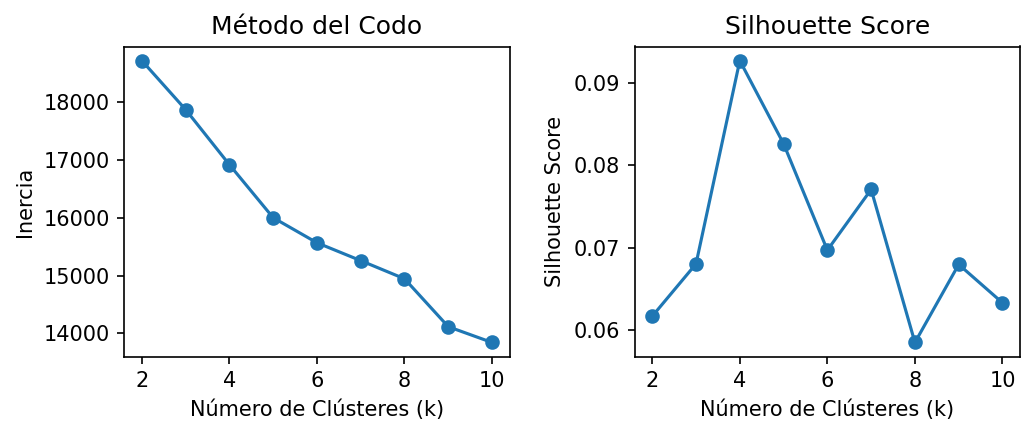

In [115]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia_values = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Gráficas
plt.figure(figsize=(7, 3), dpi=150)

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Aquí están los gráficos que te comenté más arriba. A continuación, te explico de qué trata cada uno:

 **Gráfico 1: Método del Codo (Inercia)**

🔹 Inercia: Es la suma de las distancias cuadradas entre cada punto de datos y el centroide más cercano.

📌 En el gráfico, se puede observar cómo disminuye la inercia al aumentar el número de clústeres.

🔺 El "codo" o punto de inflexión es un buen indicador del número óptimo de clústeres.

👉 En mi caso, el codo está alrededor de k = 4, pues después de este punto la inercia disminuye de manera más gradual.


 **Gráfico 2: Silhouette Score**

🔹 Este puntaje mide qué tan similar es cada punto con su propio clúster en comparación con otros clústeres.
✔️ Un valor más alto indica que los puntos están más cerca de su propio clúster y más lejos de los demás.

📌 En el gráfico, el Silhouette Score más alto se alcanza con k = 4, lo que refuerza la elección de 4 clústeres como óptimo.


**¿Qué conclusiones podemos sacar?**

✅ k = 4 es el número óptimo de clústeres según ambos métodos: el codo y el Silhouette Score.


In [116]:
# Repetimos el proceso para el conjunto de datos obtenido por medio de pca

kmeans = KMeans(n_clusters=4, random_state=0) #Recuerda que n_clusters es lo mismo que k
kmeans.fit(pca_seleccionados)

KMeans(n_clusters=4, random_state=0)

In [117]:
print(f"Centroides:\n{kmeans.cluster_centers_}")
print(f"Etiquetas de clúster para cada punto:\n{kmeans.labels_}")
pca_seleccionados["Cluster"] = kmeans.labels_

Centroides:
[[ 0.40779039 -1.51754018]
 [ 1.78058851  0.3340124 ]
 [-1.72288835 -0.27072675]
 [-0.15644431  1.01999228]]
Etiquetas de clúster para cada punto:
[2 1 2 2 3 1 1 3 3 1 3 3 3 3 0 0 0 0 2 2 3 1 1 2 2 0 0 0 0 0 3 2 3 0 2 3 3
 2 3 1 3 3 0 3 0 0 0 3 2 1 3 2 2 3 3 1 0 1 2 1 2 3 1 0 0 3 3 3 0 1 2 0 0 1
 3 1 1 0 3 1 3 0 0 2 2 2 0 2 3 2 3 0 2 3 1 2 1 1 3 3 1 0 3 2 3 2 1 2 0 3 1
 1 2 2 1 1 1 3 3 0 1 2 1 3 2 2 2 1 2 2 3 1 0 0 3 3 3 0 3 0 3 1 0 3 3 2 3 0
 3 0 3 3 1 1 3 2 2 0 3 3 3 1 3 3 0 2 0 3 2 3 1 1 3 3 0 3 0 2 3 2 3 3 0 1 1
 2 2 3 2 0 2 2 3 3 3 2 0 1 2 3 3 1 1 0 3 3 0 2 0 2 3 1 2 2 1 3 2 1 2 1 1 2
 1 2 0 3 1 1 0 2 0 3 1 0 2 0 2 2 0 2 2 0 1 1 1 2 2 1 2 3 1 3 1 1 0 1 3 3 1
 3 0 0 2 2 2 2 1 3 0 1 3 3 3 2 2 0 2 3 1 1 3 1 3 2 1 0 2 0 1 3 0 1 3 1 1 2
 1 3 0 1 2 2 0 3 2 1 1 3 3 3 1 3 3 3 3 0 0 0 0 2 0 3 1 3 1 3 2 2 3 1 2 1 0
 3 1 1 1 1 3 3 3 2 2 3 0 0 3 3 0 1 2 3 2 2 2 0 1 1 2 1 1 0 0 2 2 0 1 1 3 0
 2 2 3 3 2 2 3 0 3 2 3 1 1 0 0 0 2 0 0 0 3 3 2 2 1 1 1 3 3 2 3 2 2 3 1 3 3
 0 2 2 0 2 3 0 0

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_18392\1884879390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_seleccionados["Cluster"] = kmeans.labels_


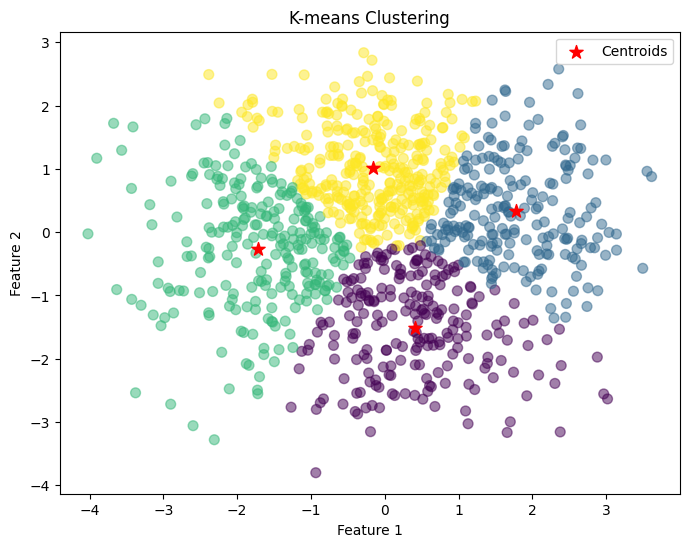

In [118]:
# Por fin podremos visualizar los cluster


plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(
    pca_seleccionados.iloc[:, 0], pca_seleccionados.iloc[:, 1], c=kmeans.labels_, s=50, cmap='viridis', alpha=0.5
)
# Plot cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    marker='*', s=100, c='red', label='Centroids'
)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

En este caso, podemos percibir que los clústeres se encuentran relativamente bien diferenciados entre sí. 📊

Esta separación puede explicarse, en parte, por la transformación que realizamos sobre la variable dependiente, la cual fue dividida estrictamente en 4 grupos. 🔢

➡️ Esta decisión metodológica también ayuda a explicar los resultados que observaremos en los gráficos siguientes, ya que la estructura impuesta influye en la forma en que los datos se agrupan.

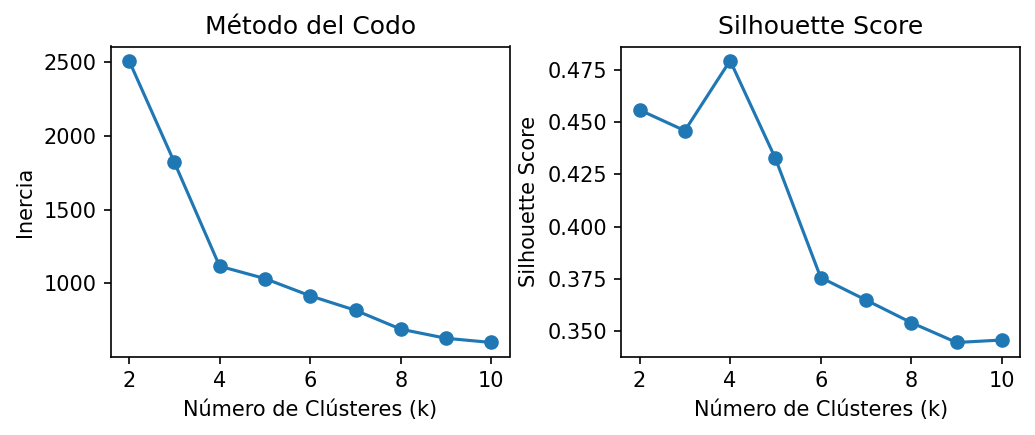

In [119]:
inertia_values = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_seleccionados)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_seleccionados, kmeans.labels_))

# Gráficas
plt.figure(figsize=(7, 3), dpi=150)

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Con base en estos resultados, podemos reafirmar que el número deseable de clústeres es 4. 🔢

📉 Por un lado, el método del codo muestra una disminución más suave de la inercia justo después de k = 4, lo cual indica que agregar más clústeres no mejora significativamente la cohesión interna de los grupos.

🌐 Por otro lado, el Silhouette Score alcanza su valor más alto también con k = 4, lo que indica una excelente separación entre los clústeres.

🧩 Todo esto puede considerarse una consecuencia directa de la forma en que estructuramos la variable dependiente al inicio del proceso, dividiéndola en 4 categorías claras.

In [126]:
# Concluimos con la aplicación k-means al ultimo conjunto de datos que obtuvimos.
kmeans = KMeans(n_clusters=4, random_state=0) #Recuerda que n_clusters es lo mismo que k
kmeans.fit(selected_columns)

KMeans(n_clusters=4, random_state=0)

In [127]:
print(f"Centroides:\n{kmeans.cluster_centers_}")
print(f"Etiquetas de clúster para cada punto:\n{kmeans.labels_}")
pca_seleccionados["Cluster"] = kmeans.labels_

Centroides:
[[ 0.03958909  0.19250706  0.22878427 -0.36175108  0.54190074  0.02922504
  -0.59653153 -0.15941514  0.24214723 -0.87741498 -0.22530837  0.25624634
  -0.16046352 -0.65805478]
 [-0.00732265  0.04526232 -0.04845803  1.46446375  0.03281888 -0.04973681
   0.41355892 -0.08852594 -0.06014808  0.03080994  0.08117678  0.0227749
   0.16805572  0.48903022]
 [-0.037122   -0.16568914 -0.07665408 -0.11977204 -0.43890906  0.10779045
  -0.80425188  0.45270838  0.02261349  0.46947691  0.04034674 -0.34786541
  -0.53961211 -1.01580059]
 [ 0.00461864 -0.04248803 -0.06201405 -0.6828438  -0.07383864 -0.05753519
   0.64292379 -0.14266215 -0.12950278  0.22497199  0.06200853  0.05467994
   0.3521056   0.77355987]]
Etiquetas de clúster para cada punto:
[2 3 2 2 2 3 3 3 3 1 2 0 3 3 3 3 1 2 2 0 2 3 3 2 2 1 0 0 1 1 3 2 2 3 2 3 0
 0 0 3 2 2 1 0 3 1 1 1 2 3 1 2 2 1 0 3 0 1 2 1 2 3 3 3 1 3 0 0 3 3 2 2 1 1
 2 1 1 2 3 3 0 2 2 0 2 0 3 0 3 0 0 2 0 0 3 2 3 3 1 2 1 0 2 0 3 0 1 0 1 3 1
 3 2 2 3 3 1 3 1 0 3 0 3 

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_18392\1884879390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_seleccionados["Cluster"] = kmeans.labels_


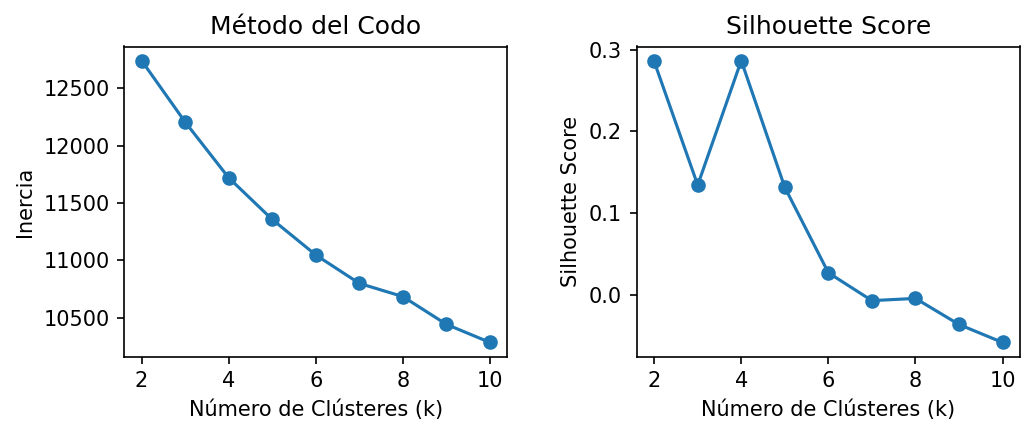

In [128]:
inertia_values = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(selected_columns)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_seleccionados, kmeans.labels_))

# Gráficas
plt.figure(figsize=(7, 3), dpi=150)

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

En esta ocasión encontramos dos hechos bastante llamativos:

1️⃣ Al igual que en el primer caso, no fue posible realizar el gráfico de clústeres, ya que el número de variables es superior a 2, lo que impide proyectar los resultados en un plano bidimensional.

2️⃣ A diferencia de los dos escenarios anteriores, el método del codo no muestra un punto de inflexión claro que nos ayude a determinar el número óptimo de clústeres. 📉
Sin embargo, el método del Silhouette Score 🌐 indica que sería indistinto elegir entre 2 o 4 clústeres, ya que ambos valores de k obtienen el mismo puntaje, lo que sugiere una separación similar entre los grupos en ambos casos.



## **¡Hemos llegado al final de este curso!** 🎉

Espero que te hayas divertido un montón realizando cada uno de los ejercicios que aquí te he dejado, y sobre todo, que hayas aprendido cosas nuevas y útiles para tus futuros proyectos de ciencia de datos y machine learning. 🚀📚

Durante este viaje exploramos herramientas poderosas para la reducción de dimensiones, la selección de variables y la agrupación de datos, todo esto con el objetivo de extraer información significativa de conjuntos de datos reales. 😎📊

✅ Como principales conclusiones me gustaría decirte:

1️⃣ Aprender técnicas de Machine Learning es un proceso continuo de experimentación, prueba y error. A veces puede parecer que estamos haciendo cosas sin mucho sentido, ¡pero créeme!, equivocarse, probar y volver a intentar es parte fundamental del aprendizaje. 💡🔁

2️⃣ Aprendimos a aplicar PCA (Análisis de Componentes Principales), una técnica increíble para reducir la dimensionalidad de los datos sin perder demasiada información. Con el scree plot pudimos observar cómo varía la varianza explicada por cada componente, y luego visualizamos los datos en solo dos dimensiones para detectar agrupaciones naturales. 🧠🎯

3️⃣ También trabajamos en seleccionar las variables más relevantes, ya sea eliminando aquellas altamente correlacionadas o utilizando algoritmos que miden la importancia de cada característica. Esto no solo mejora la eficiencia del modelo, sino que además nos obliga a pensar críticamente sobre la estructura de nuestros datos. 🧹🔍

4️⃣ Finalmente, nos sumergimos en el mundo del K-means, un algoritmo fundamental para la agrupación (clustering). Lo aplicamos sobre tres versiones diferentes de nuestros datos:

El conjunto original,

El reducido por PCA,

Y el optimizado por selección de variables.

Evaluamos los resultados utilizando el método del codo y el silhouette score, entendiendo cuándo un número determinado de clústers tiene más sentido. 📈📉

--- 

🤖 En cuanto a buenas prácticas generales, no olvides por favor:

☑️ Limpieza de datos primero: asegúrate de que no haya valores faltantes ni variables no numéricas, especialmente si vas a aplicar PCA o K-means.

☑️ Estandarización siempre: normalizar las variables antes de aplicar PCA o algoritmos basados en distancia es fundamental para obtener resultados fiables.

☑️ Visualiza, interpreta y vuelve a intentar: cada gráfico y cada métrica te cuenta una historia. No te frustres si no ves agrupaciones claras a la primera, ¡sigue explorando! 🧗‍♂️📌

---

💬 Si llegaste hasta aquí: ¡gracias por tu tiempo, tu curiosidad y tu esfuerzo!

Te invito a seguir practicando, equivocándote y aprendiendo. Cada línea de código que escribas es una inversión en tu crecimiento como científico o científica de datos.

¡Nos vemos en el próximo curso! 😊👨‍💻✨
Y recuerda: los datos hablan… solo tienes que saber escucharlos. 🔍💬
